# Fast Fourier Transform

references: 
 - https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
 - https://realpython.com/python-scipy-fft/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

<AxesSubplot:title={'center':'Amplitude'}>

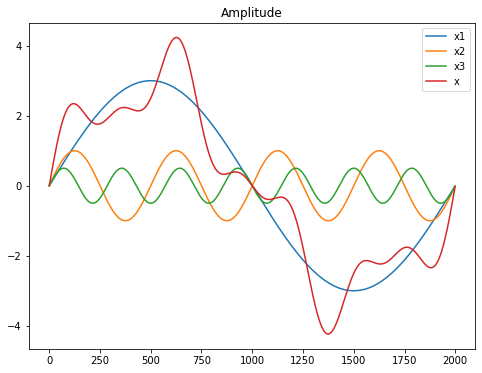

In [2]:
sr = 2000  # sampling rate
ts = 1.0/sr # sampling interval

t = np.arange(0, 1, ts)
ampA, freqA = 3, 1
ampB, freqB = 1, 4
ampC, freqC = 0.5, 7

x1 = ampA * np.sin(2*np.pi*freqA*t)
x2 = ampB * np.sin(2*np.pi*freqB*t)
x3 = ampC * np.sin(2*np.pi*freqC*t)
x = x1+x2+x3

data = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x3": x3,
    "x": x
})

data.plot(title='Amplitude', figsize = (8, 6))

In [3]:
fft?

Signature: fft(a, n=None, axis=-1, norm=None)
Docstring:
Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional *n*-point discrete Fourier
Transform (DFT) with the efficient Fast Fourier Transform (FFT)
algorithm [CT].

Parameters
----------
a : array_like
    Input array, can be complex.
n : int, optional
    Length of the transformed axis of the output.
    If `n` is smaller than the length of the input, the input is cropped.
    If it is larger, the input is padded with zeros.  If `n` is not given,
    the length of the input along the axis specified by `axis` is used.
axis : int, optional
    Axis over which to compute the FFT.  If not given, the last axis is
    used.
norm : {"backward", "ortho", "forward"}, optional
    .. versionadded:: 1.10.0

    Normalization mode (see `numpy.fft`). Default is "backward".
    Indicates which direction of the forward/backward pair of transforms
    is scaled and with what normalization factor.

    

C:\Users\Gabe\AppData\Local\Temp\ipykernel_11392\3561790864.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


(0.0, 10.0)

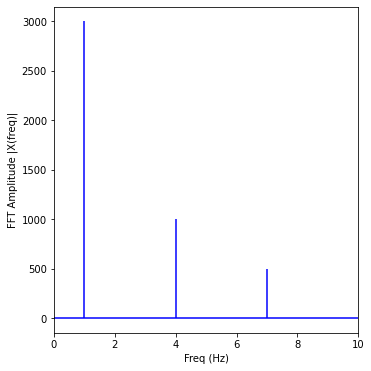

In [4]:
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

C:\Users\Gabe\AppData\Local\pypoetry\Cache\virtualenvs\2021-22-semester2-2orPFUWg-py3.9\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<AxesSubplot:>

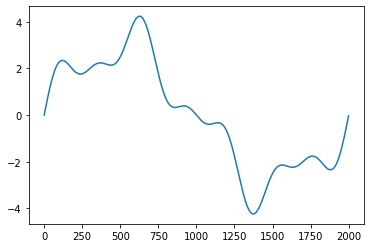

In [7]:
inverse_fft = ifft(X)
plt.plot(t, inverse_fft, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

C:\Users\Gabe\AppData\Local\pypoetry\Cache\virtualenvs\2021-22-semester2-2orPFUWg-py3.9\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<AxesSubplot:>

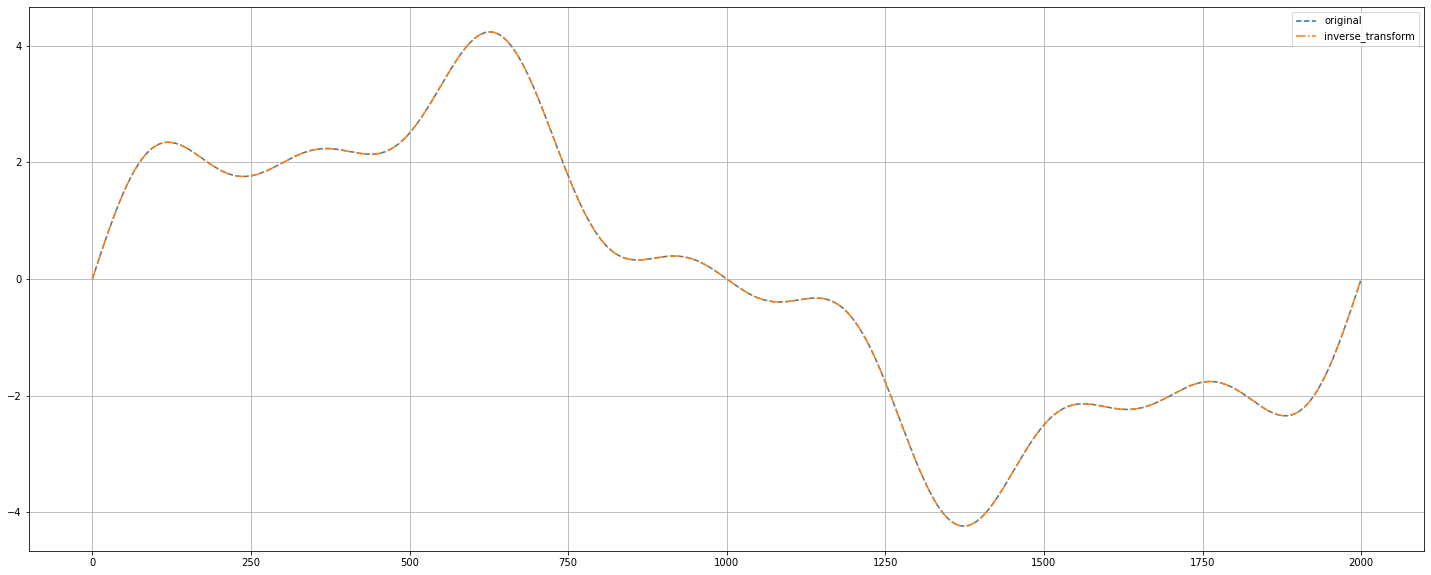

In [6]:
pd.DataFrame({
    "original": x,
    "inverse_transform": inverse_fft
}).plot(style=["--", "-."], figsize=(25,10), grid=True)